CET1021 Data Structures and Algorithms with Python

---
## Graph (Part 2)


### Objectives

- Minimum Spanning Tree of Graph
 - Prim's Algorithm
 - Kruskal's Algorithm
---

## Minimum Spanning Tree (MST)
- Recall the definition of spanning tree:
    - Spanning tree is a tree (i.e., connected graph with no cycles) that spans all the vertices of the original graph, while preserving the connectivity of the graph.

Suppose you are given a weighted undirected graph as follow:

![Weighted Spanning Tree](https://i.ibb.co/qDFx0kt/Slide42.png)

We could think of the vertices as houses, and the weights as the distances between them. Suppose you are tasked with supplying all of these houses with some commodity such as water, gas, or electricity. For obvious reasons, you would want to keep the amount of digging and laying of pipes or cable to a minimum. Hence, what is the best pipe or cable layout that has the shortest overall length?

We would have to choose some of the edges to dig along, but not all of them. For example, if we have already chosen the edge between $A$ and $D$, and the one between $B$ and $D$, then there is no reason to also have the one between A and B. More generally, <u>it is clear that we want to avoid cycles</u>. Also, assuming that we have only one feeding-in point (it is of no importance which of the vertices that is), we need the whole layout to be connected.

Hence, what we are looking for is a ***Minimum Spanning Tree*** of the graph.

> In this context, ***Minimum*** refers to the sum of all the weights of the edges contained in the spanning tree is minimal.

> Mathematical Definition: Minimum Spanning Tree, Let $w(e)$ denote the weight of an edge and $w(T)$ denote the total weight of edges in any spanning tree $T$ of a weighted graph $G = (v, e, w)$ as below,
 $$ w(T)= \sum_{e \in T}^{} w(e)  $$ The MST of $G$ is the tree $T$ with minimum $w(T )$ value
 
As we shall see, there will not necessarily be a unique minimum spanning tree for a given graph.

Let us assume, for the time being, that all the weights in the above graph were equal, to give us some idea of what kind of shape a minimum spanning tree might look like under those circumstances. Here are some examples:

![MST shapes](https://i.ibb.co/4MHwhZV/Slide43.png)

- Notice that their general shape is such that if we add any of the remaining edges, we would create a cycle.

- The MST contains $(v-1)$ edges, where $v$ is the number of vertices in the graph.

---  

## Prim's Algorithm

1. Start with an arbitrary vertex and add it to the tree, **MST**.
2. Look at all edges that connect the tree to vertices not yet in the tree.
3. Select the edge with the smallest weight and add the connecting vertex to the tree. *Note that this should not create a cycle*
4. Repeat steps 2 and 3 until all vertices have been added to the tree.

For the above graph, starting with **MST = A**, the tree is built up as follows:
![Prim's](https://i.ibb.co/X5Tt93n/Slide44.png)

For implementation
- Can use a list `visited` to keep track of the vertices that have been added into the tree so far.
- Can maintain another list `unvisited_edges` keep track of the edges, and associated weights and vertices, which have not yet been added into the tree. 

In [ ]:
import sys
def prim(graph,start):
    mst = []
    visited = set()
    uvisited_edges = [(0,start,None)] # 这是什么意思啊
    while uvisited_edges:
        min_weight = sys.maxsize
        min_vertex = None
        min_parent = None
        for weight,vertex,parent in uvisited_edges:
            if vertex not in visited and weight < min_weight:
                min_weight = weight
                min_vertex = vertex
                min_parent = parent
            if min_vertex is None:
                break
            uvisited_edges.remove((min_weight,min_vertex,min_parent))
            visited.add(min_vertex)
        for v,w in graph[min_vertex].items():
            if v not in visited:
                uvisited_edges.append((v,w,min_vertex))
    return mst
            
        

In [4]:
import sys
def prim(graph, start):
    mst = []
    visited = set()
    unvisited_edges = [(0, start, None)]
    while unvisited_edges:
        # Find the vertex with the smallest weight that is not in the minimum spanning tree
        min_weight = sys.maxsize
        min_vertex = None
        min_parent = None
        for weight, vertex, parent in unvisited_edges:
            if vertex not in visited and weight < min_weight:
                min_weight = weight
                min_vertex = vertex
                min_parent = parent
        if min_vertex is None:
            break
        unvisited_edges.remove((min_weight, min_vertex, min_parent))
        visited.add(min_vertex)
        if min_parent is not None:
            mst.append((min_parent, min_vertex, min_weight))
        for v, w in graph[min_vertex].items():
            if v not in visited:
                unvisited_edges.append((w, v, min_vertex))
    return mst

graph = {
    'A': {'B': 6, 'C': 5, 'D': 1},
    'B': {'A': 6, 'D': 5, 'E': 3},
    'C': {'A': 5, 'D': 5, 'F': 2},
    'D': {'A': 1, 'B': 5, 'C': 5, 'E': 6, 'F': 4},
    'E': {'B': 3, 'D': 6, 'F': 6},
    'F': {'C': 2, 'D': 4, 'E': 6},
}

print(prim(graph, 'A'))

[('A', 'D', 1), ('D', 'F', 4), ('F', 'C', 2), ('D', 'B', 5), ('B', 'E', 3)]


In [ ]:
graph = {
    'A': {'B': 6, 'C': 5, 'D': 1},
    'B': {'A': 6, 'D': 5, 'E': 3},
    'C': {'A': 5, 'D': 5, 'F': 2},
    'D': {'A': 1, 'B': 5, 'C': 5, 'E': 6, 'F': 4},
    'E': {'B': 3, 'D': 6, 'F': 6},
    'F': {'C': 2, 'D': 4, 'E': 6},
}
unvisited_edges = [0,'A',None]

for weight,vertex,parent in unvisited_edges:
    min_weight = sys.maxsize
    if weight < min_weight:
        min_weight = weight
        min_vertex = vertex
        min_parent = parent

Another example: find the MST using Prim Algorithm of the following graph. 
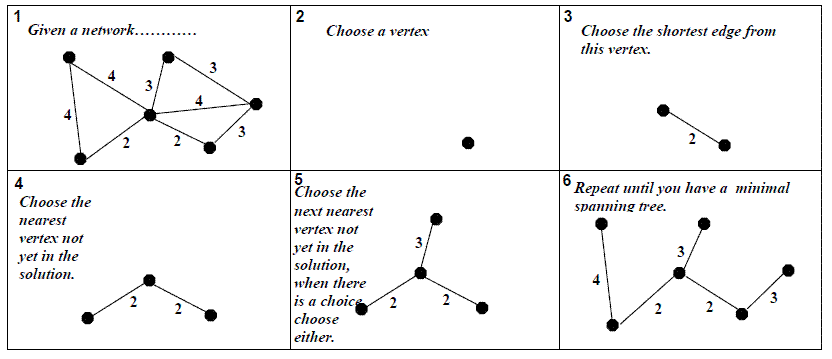

Find the MST using Prim's Algorithm for the following graph, starting from vertex C
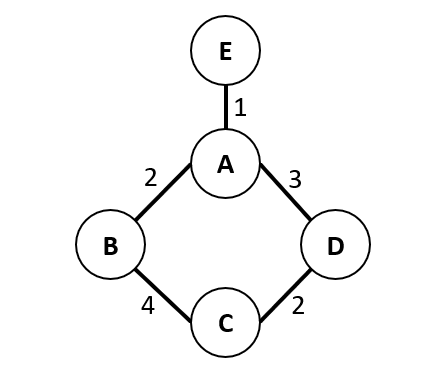

In [5]:
graph = {
    'A': {'B': 2, 'D': 3, 'E': 1},
    'B': {'A': 2, 'C': 4},
    'C': {'B': 4, 'D': 2},
    'D': {'A': 3, 'C': 2},
    'E': {'A': 1}
}

print(prim(graph, 'C'))

[('C', 'D', 2), ('D', 'A', 3), ('A', 'E', 1), ('A', 'B', 2)]


---

## Kruskal's Algorithm

This algorithm does not consider the vertices directly at all, but builds an MST by considering and adding edges as follows: 

- Assume that we already have a collection of edges $T$. 
- Then, from all the edges not yet in $T$, choose the one with minimal weight such that its addition to $T$ does not produce a cycle, and add that to $T$. 
- If we start with $T$ being an empty set, and continue until no more edges can be added, a MST will be produced. The MST contains $(v-1)$ edges, where $v$ is the number of vertices in the graph.

This approach is known as ***Kruskal's algorithm***.

For the same graph that was used for Prim's algorithm, the algorithm proceeds as follows:

![Kruskal's](https://i.ibb.co/34xbqdy/Slide46.png)

In [6]:
def find(parent, vertex): # recursively find the root of vertex
    if parent[vertex] == vertex:
        return vertex
    return find(parent, parent[vertex])

def union(parent, rank, x, y):
    xroot = find(parent, x)
    yroot = find(parent, y)
    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[xroot] > rank[yroot]:
        parent[yroot] = xroot
    else:
        parent[yroot] = xroot
        rank[xroot] += 1

def kruskal(graph):
    result = []
    i, e = 0, 0
    edges = []
    for node in graph:
        for neighbor in graph[node]:
            edges.append((graph[node][neighbor], node, neighbor))
    edges.sort(key=lambda x: x[0]) # sort based on weight of edges
    print("sorted edges of the graph:\n", edges)
    parent = {}
    rank = {}
    for node in graph:
        parent[node] = node
        rank[node] = 0
    while e < len(graph) - 1:
        weight, u, v = edges[i]
        i = i + 1
        x = find(parent, u)
        y = find(parent, v)
        if x != y:
            e = e + 1
            result.append([u, v, weight])
            union(parent, rank, x, y)

    return result

graph = {
    'A': {'B': 6, 'C': 5, 'D': 1},
    'B': {'A': 6, 'D': 5, 'E': 3},
    'C': {'A': 5, 'D': 5, 'F': 2},
    'D': {'A': 1, 'B': 5, 'C': 5, 'E': 6, 'F': 4},
    'E': {'B': 3, 'D': 6, 'F': 6},
    'F': {'C': 2, 'D': 4, 'E': 6},
}

print("\n------------------------------\nMST:", kruskal(graph))

sorted edges of the graph:
 [(1, 'A', 'D'), (1, 'D', 'A'), (2, 'C', 'F'), (2, 'F', 'C'), (3, 'B', 'E'), (3, 'E', 'B'), (4, 'D', 'F'), (4, 'F', 'D'), (5, 'A', 'C'), (5, 'B', 'D'), (5, 'C', 'A'), (5, 'C', 'D'), (5, 'D', 'B'), (5, 'D', 'C'), (6, 'A', 'B'), (6, 'B', 'A'), (6, 'D', 'E'), (6, 'E', 'D'), (6, 'E', 'F'), (6, 'F', 'E')]

------------------------------
MST: [['A', 'D', 1], ['C', 'F', 2], ['B', 'E', 3], ['D', 'F', 4], ['B', 'D', 5]]


Let's use a simpler graph to walk through the codes of Kruskal's Algorithm
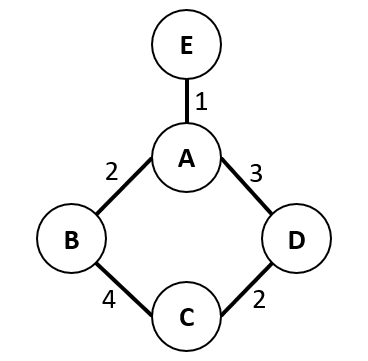

In [7]:
graph = {
    'A': {'B': 2, 'D': 3, 'E': 1},
    'B': {'A': 2, 'C': 4},
    'C': {'B': 4, 'D': 2},
    'D': {'A': 3, 'C': 2},
    'E': {'A': 1}
}

print("\n------------------------------\nMST:", kruskal(graph))

sorted edges of the graph:
 [(1, 'A', 'E'), (1, 'E', 'A'), (2, 'A', 'B'), (2, 'B', 'A'), (2, 'C', 'D'), (2, 'D', 'C'), (3, 'A', 'D'), (3, 'D', 'A'), (4, 'B', 'C'), (4, 'C', 'B')]

------------------------------
MST: [['A', 'E', 1], ['A', 'B', 2], ['C', 'D', 2], ['A', 'D', 3]]


In [8]:
# Compare with netwrokx
import networkx as nx

G = nx.Graph() # Create an undirected graph
G.add_edges_from([('A', 'B', {'weight': 2}),
                  ('A', 'D', {'weight': 3}),
                  ('A', 'E', {'weight': 1}),
                  ('B', 'C', {'weight': 4}),
                  ('C', 'D', {'weight': 2})
                 ])

mst = nx.minimum_spanning_tree(G)
print(mst.edges(data=True))

[('A', 'E', {'weight': 1}), ('A', 'B', {'weight': 2}), ('A', 'D', {'weight': 3}), ('D', 'C', {'weight': 2})]


Exercise: find the MST using Kruskal’s algorithm for the below graph. 
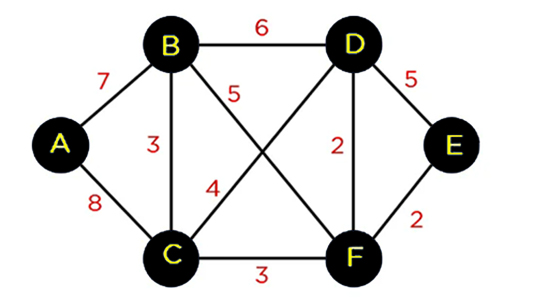

In [9]:
graph = {
    'A': {'B': 7, 'C': 8},
    'B': {'A': 7, 'C': 3, 'D': 6, 'F': 5},
    'C': {'A': 8, 'B': 3, 'D': 4, 'F': 3},
    'D': {'B': 6, 'C': 4, 'E': 5, 'F': 2},
    'E': {'D': 5, 'F': 2},
    'F': {'B': 5, 'C': 3, 'D': 2, 'E': 2}
}

print("\n------------------------------\nMST:", kruskal(graph))

sorted edges of the graph:
 [(2, 'D', 'F'), (2, 'E', 'F'), (2, 'F', 'D'), (2, 'F', 'E'), (3, 'B', 'C'), (3, 'C', 'B'), (3, 'C', 'F'), (3, 'F', 'C'), (4, 'C', 'D'), (4, 'D', 'C'), (5, 'B', 'F'), (5, 'D', 'E'), (5, 'E', 'D'), (5, 'F', 'B'), (6, 'B', 'D'), (6, 'D', 'B'), (7, 'A', 'B'), (7, 'B', 'A'), (8, 'A', 'C'), (8, 'C', 'A')]

------------------------------
MST: [['D', 'F', 2], ['E', 'F', 2], ['B', 'C', 3], ['C', 'F', 3], ['A', 'B', 7]]


---

->

<!-- <img src="https://drive.google.com/uc?export=view&id=1pvlhuhoGl4lL1PJxMQiGEWQh39X9ZpEM"> -->
